# Part II - Steam Games from 2013 to 2023 success exploration


## by Hessa



## Investigation Overview


The primary goals of the presentation are to:

Highlight Key Market Trends: Illustrate the impact of game pricing and the rise of indie games on the market, emphasizing the significant contrast between free or low-priced games and those priced above $30.

Analyze Sales and Game Length: Demonstrate the relationship between game length and sales, focusing on how shorter games often achieve higher sales and the role of critical acclaim in this dynamic.


Explore the Critical Acclaim and Sales Relationship: Investigate the correlation between critical acclaim and sales, revealing that critical acclaim does not always equate to higher sales.


## Dataset Overview

The 3 datasets compile the information of the releases that occurred between 2013 and 2023 of the most successful platform for selling video games on PC, Steam. With an estimated number of sales, release dates, among other kinds of variables.

> Reference link: https://www.kaggle.com/datasets/terencicp/steam-games-december-2023

In [32]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [33]:
# load in the dataset into a pandas dataframe
df_main_games = pd.read_csv('/content/datafiles/games.csv')
df_categories_games = pd.read_csv('/content/datafiles/t-games-categories.csv')
df_tag_games = pd.read_csv('/content/datafiles/t-games-tags.csv')

In [34]:
# Merge df_main_games-df_categories_games
df_merged_c = pd.merge(df_main_games, df_categories_games, on='app_id', how='left')
grouped_data_c = df_merged_c.groupby('app_id')['categories'].apply(list).reset_index()
# Merge df_main_games-df_tag_games
df_merged_t = pd.merge(df_main_games, df_tag_games, on='app_id', how='left')
grouped_data_t = df_merged_t.groupby('app_id')['tags'].apply(list).reset_index()
# Final Merge
df_main_games = pd.merge(df_main_games, grouped_data_c, on='app_id')
df = pd.merge(df_main_games, grouped_data_t, on='app_id')

In [35]:
# Create the new column based on the average
df['avg_owners'] = df[['min_owners', 'max_owners']].mean(axis=1)

# Modify the new column based on the conditions
df['avg_owners'] = df['avg_owners'].replace(10000, 100) #We define 100 to try to be fairer to those who abound but do not sell with the others who have modest sales.

# Classify games as high-priced or modestly priced
price_threshold = 20 # Using the price above 75% of all prices
df['price_category'] = df['price'].apply(lambda x: 'High' if x > price_threshold else 'Modest')

In [36]:
# Calculate the ratio of positive to negative reviews
df['review_ratio'] = df['positive'] / (df['negative'] + 1)

In [37]:
# Extract month and quarter
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dropna()
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter
# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

In [38]:
df

,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,categories,tags,avg_owners,price_category,review_ratio,release_month,release_quarter,release_year
0,Train Bandit,2017-10-12,0.99,53,5,655370,0,20000,NaN,"[Single-player, Steam Achievements, Full contr...","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...",100.0,Modest,8.833333,10.0,4.0,2017.0
1,Henosis™,2020-07-23,5.99,3,0,1355720,0,20000,NaN,"[Single-player, Full controller support]","[2D Platformer, Atmospheric, Surreal, Mystery,...",100.0,Modest,3.000000,7.0,3.0,2020.0
2,Two Weeks in Painland,2020-02-03,0.00,50,8,1139950,0,20000,NaN,"[Single-player, Steam Achievements]","[Indie, Adventure, Nudity, Violent, Sexual Con...",100.0,Modest,5.555556,2.0,1.0,2020.0
3,Wartune Reborn,2021-02-26,0.00,87,49,1469160,50000,100000,NaN,"[Single-player, Multi-player, MMO, PvP, Online...","[Turn-Based Combat, Massively Multiplayer, Mul...",75000.0,Modest,1.740000,2.0,1.0,2021.0
4,TD Worlds,2022-01-09,10.99,21,7,1659180,0,20000,NaN,"[Single-player, Steam Achievements, Steam Cloud]","[Tower Defense, Rogue-lite, RTS, Replay Value,...",100.0,Modest,2.625000,1.0,1.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60947,Two Cubes,2023-08-14,0.99,54,0,2511290,0,20000,NaN,"[Multi-player, Co-op, Online Co-op, Steam Achi...","[Online Co-Op, Adventure, 2D Platformer, Puzzl...",100.0,Modest,54.000000,8.0,3.0,2023.0
60948,Wisp Child,2023-10-20,14.99,5,0,2424000,0,20000,NaN,"[Single-player, Full controller support]","[Action, Adventure, Action-Adventure, Puzzle, ...",100.0,Modest,5.000000,10.0,4.0,2023.0
60949,FireKrackers,2023-09-17,4.99,1,0,2237270,0,20000,NaN,"[Single-player, Tracked Controller Support, VR...","[VR, Arcade, Puzzle-Platformer, Action, Destru...",100.0,Modest,1.000000,9.0,3.0,2023.0
60950,nekowater,2023-11-21,2.99,2,1,2650840,0,20000,NaN,"[Single-player, Steam Achievements, Remote Pla...","[Adventure, Cats, Cute, First-Person, Explorat...",100.0,Modest,1.000000,11.0,4.0,2023.0


## The relationship between sales (using avg_owners as a proxy), critical acclaim (using review_ratio as a proxy), and game length (hltb_single)

**Sales and Game Length:**

The strongest relationship observed is that games under 20 hours generally achieve higher sales conversion rates. This suggests that shorter games are more popular among players who prefer concise experiences.

**Sales and Critical Acclaim:**

There is no strong correlation between sales and critical acclaim. Popular games with high sales do not always receive high praise from critics, indicating that critical acclaim does not necessarily drive sales. Conversely, critically acclaimed games may not always be the most popular.

**Critical Acclaim and Game Length:**

The relationship between game length and critical acclaim is weak. Games with shorter playtimes (3 to 15 hours) often receive higher positive reviews, but the quality of the game itself is less relevant to its critical reception. This indicates that players prefer shorter, engaging experiences, though this preference does not always align with the level of acclaim a game receives.


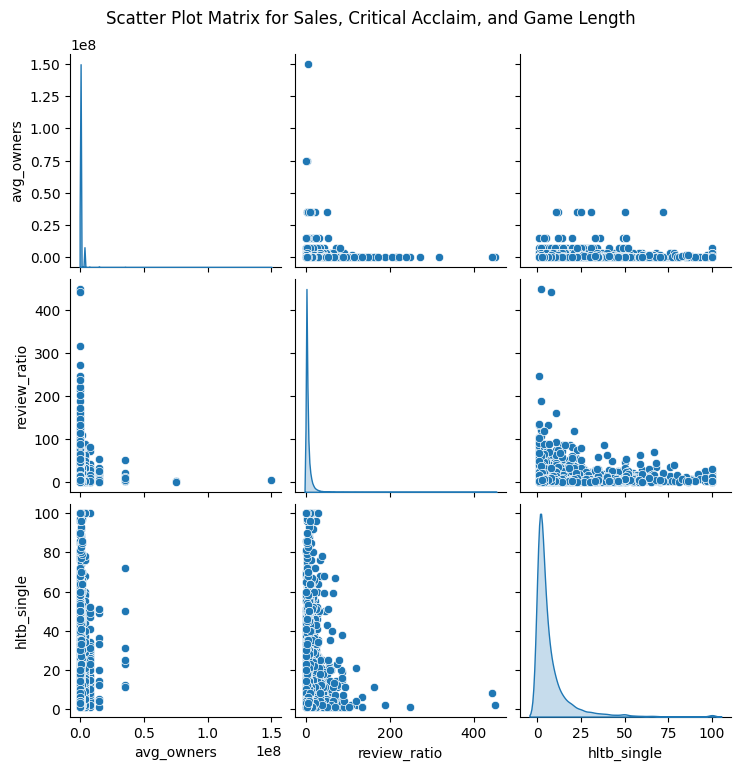

In [39]:
# Select the relevant columns for multivariate analysis
df_multivariate = df[['avg_owners', 'review_ratio', 'hltb_single']]

# Pairplot to see the relationship between avg_owners, review_ratio, and hltb_single
sb.pairplot(df_multivariate, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Sales, Critical Acclaim, and Game Length', y=1.02)
plt.show()

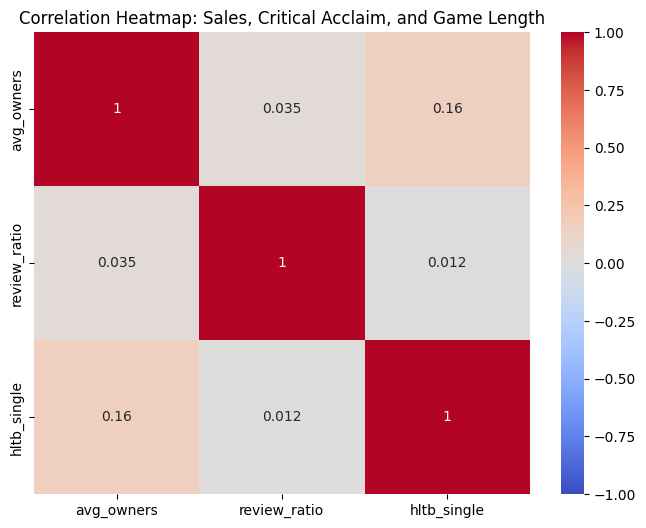

In [40]:
# Calculate the correlation matrix
corr_matrix = df_multivariate.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Sales, Critical Acclaim, and Game Length')
plt.show()


## Seasonal trends in game releases. Between high-priced and modestly priced game

Games under 10 dominate the market, with a clear distinction between indie games and big productions using a 20 threshold. Indie games, despite targeting niche markets, show a similar release pattern to major games: fewer releases mid-year with a peak at the end of the year. Overall, game launches are fairly consistent throughout the year.

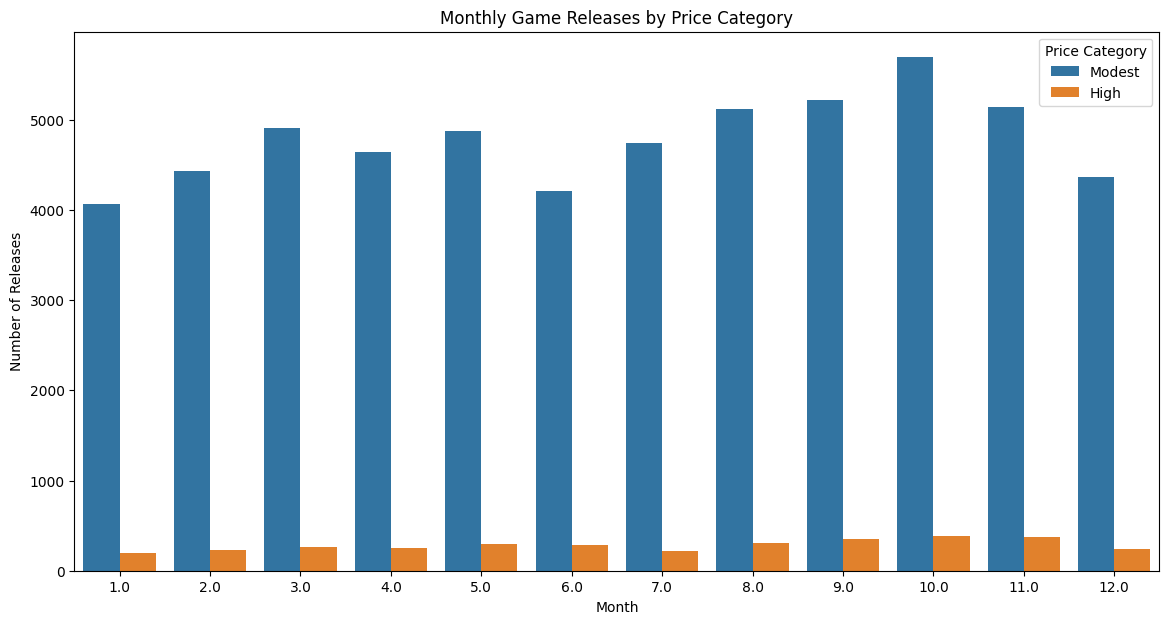

In [41]:
plt.figure(figsize=(14, 7))

# Plotting monthly release trends
sb.countplot(data=df, x='release_month', hue='price_category')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Game Releases by Price Category')
plt.legend(title='Price Category')
plt.show()

## Sales Distribution Between High-Priced and Modestly Priced Games

The modest price category, which includes free-to-play games and indie titles, saw a strong initial presence from big-budget free games. These games dominated early on, leading to high annual sales for higher-priced games as the market for free games became saturated.

**Conclusions**

Game prices reveal a clear divide between free/inexpensive games and those over $30. The growth of indie games has led to many lower-priced titles, often monetized through microtransactions. The COVID-19 pandemic caused a temporary dip in game releases in 2022, but the market has since recovered with ongoing post-pandemic effects.

**Key Insights:**

Ownership and Pricing: There is a strong logarithmic relationship in ownership ranges.

Review Ratios: Mostly low, with high ratios associated with critically acclaimed games.

Popularity and Reviews: Higher ownership correlates with better reviews.

**Additional Notes:**

Game Length: Shorter games generally have better sales and are often critically acclaimed.

Release Trends: Game releases peak at the end of the year, influenced significantly by free-to-play games.

Critical Acclaim: Limited correlation with sales; success is driven by multiple factors.

The market remains dynamic with the blend of free-to-play and indie games.

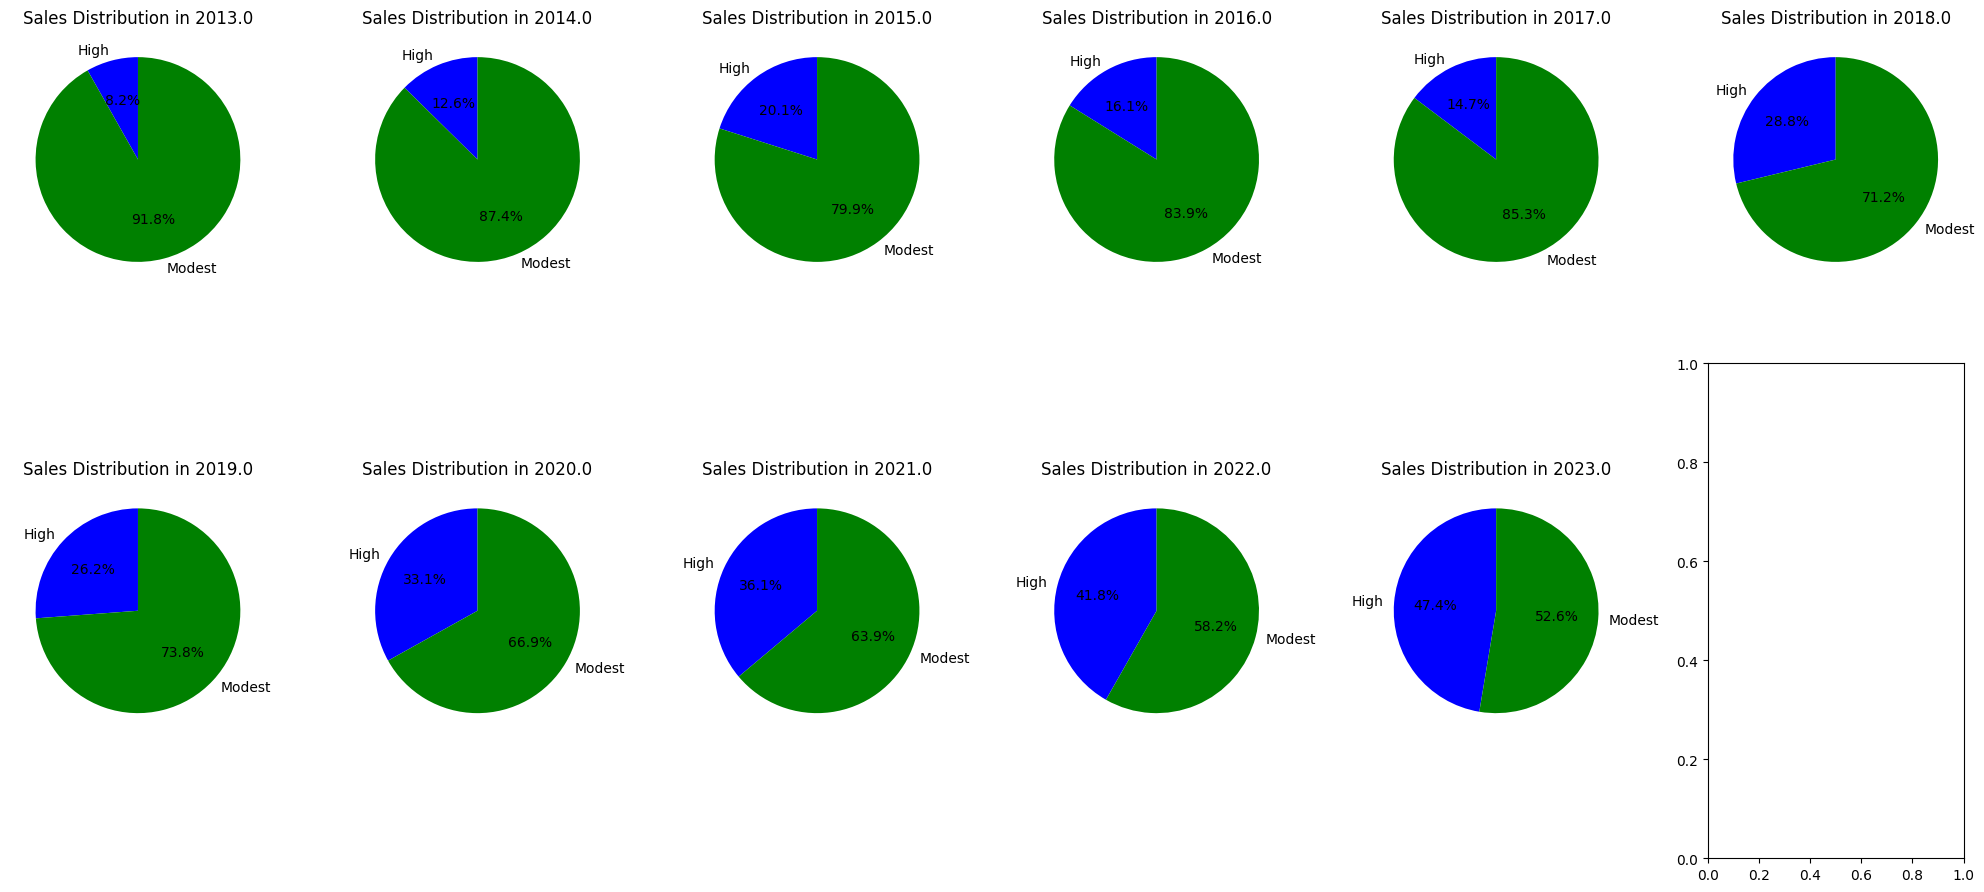

In [42]:
# Aggregate total average owners per year for each price category
annual_sales = df.groupby(['release_year', 'price_category'])['avg_owners'].sum().reset_index()

# List of unique years
years = annual_sales['release_year'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=len(years)//2 + len(years)%2, figsize=(20, 10))
axes = axes.flatten()

# Plot pie charts
for i, year in enumerate(years):
    data = annual_sales[annual_sales['release_year'] == year]
    axes[i].pie(data['avg_owners'], labels=data['price_category'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
    axes[i].set_title(f'Sales Distribution in {year}')

plt.tight_layout()
plt.show()
